<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \gamma L \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8m/s$ la aceleración de la gravedad  y  $\gamma$ la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\sin(\theta) - \gamma L \omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$ no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos como el de Runge-Kutta?
6. Realizar una animación para del movimiento del péndulo simple, con las soluciones dadas en el método de RungeKutta.

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint,simpson
from sympy import pi


In [115]:
def fun(u,t,params):    #t está de manera implícita
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        u (array):
            theta (float): Ángulo de desplazamiento (en radianes).
            omega (float): Velocidad angular (en radianes/segundo).
        params (tuple):
            g (float): Aceleración debida a la gravedad (en m/s²).
            L (float): Longitud del hilo del péndulo (en metros).
            r (float): Constante de amortigüamiento.

    Returns:
        Array: Derivadas de theta y omega.
    """
    g=params[0]
    L=params[1]
    r=params[2]

    θ=u[0]
    w=u[1]
    dθdt=w
    dwdt=-g/L*np.sin(θ)-r*L*w

    dudt=np.array([dθdt,dwdt])

    return dudt

def fun1(u,t,params):           #esta es para hacer la comparación sinθ=θ
    g=params[0]
    L=params[1]
    r=params[2]

    θ=u[0]
    w=u[1]
    dθdt=w
    dwdt1=-g/L*θ-r*L*w          #sinθ=θ

    dudt1=np.array([dθdt,dwdt1])    #sinθ=θ

    return dudt1

In [116]:
#Condiciones iniciales
θ0=np.pi/2
w0=1

#Parámetros
r=0.3
g=9.81
L=1
params=(g,L,r)

#Límites
ta=0
tb=30
dt=0.01

n=int((tb-ta)/dt)
t=np.linspace(ta,tb,n)

# Euler

In [117]:
def euler(ta,tb,θ0,w0,dt,params):
    n=int((tb-ta)/dt)

    u=np.zeros((n,2))
    u[0]=np.array([θ0,w0])

    for i in range(n-1):
        u[i+1]=u[i]+dt*fun(u[i],i,params)

    θ=u[:,0]
    w=u[:,1]

    return θ,w

In [118]:
θ,w=euler(ta,tb,θ0,w0,dt,params)

# Runge-Kutta

In [119]:
def runge(ta,tb,θ0,w0,dt,params,K):
    n=int((tb-ta)/dt)
    t=np.linspace(ta,tb,n)
    u=np.zeros((n,2))
    u[0]=np.array([θ0,w0])

    if K==1:
        for i in range(n-1):                #está hecho de esta manera para hacer la comparación de sinθ=θ
            k1=fun1(u[i],t[i],params)
            k2=fun1(u[i]+dt/2*k1,t[i]+dt/2,params)
            k3=fun1(u[i]+dt/2*k2,t[i]+dt/2,params)
            k4=fun1(u[i]+dt*k3,t[i]+dt,params)
            kmean=(1/6)*(k1+2*k2+2*k3+k4)
            u[i+1]=u[i]+kmean*dt
    if K==0:
        for i in range(n-1):
            k1=fun(u[i],t[i],params)
            k2=fun(u[i]+dt/2*k1,t[i]+dt/2,params)
            k3=fun(u[i]+dt/2*k2,t[i]+dt/2,params)
            k4=fun(u[i]+dt*k3,t[i]+dt,params)
            kmean=(1/6)*(k1+2*k2+2*k3+k4)
            u[i+1]=u[i]+kmean*dt

    θ=u[:,0]
    w=u[:,1]

    return θ,w

In [120]:
θr,wr=runge(ta,tb,θ0,w0,dt,params,0)

# Odeint

In [121]:
u0=np.array([θ0,w0])
sol=odeint(fun,u0,t,args=(params,))

θode=sol[:,0]
wode=sol[:,1]

# Plots

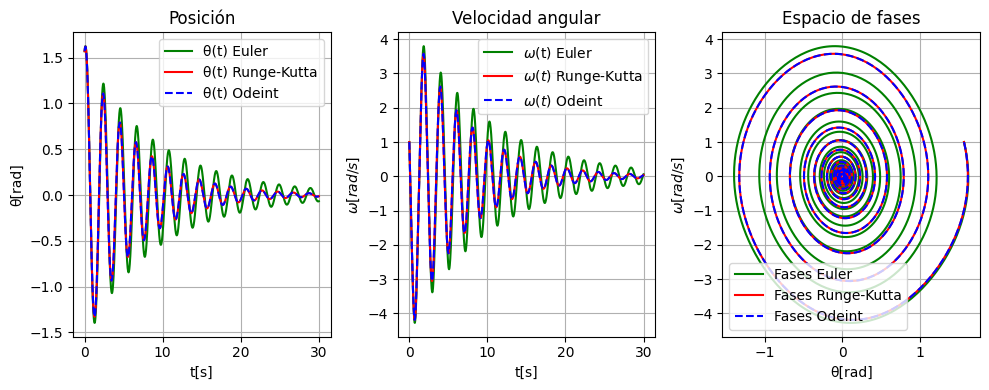

In [122]:
fig,axes=plt.subplots(1,3,figsize=(10,4))

axes[0].plot(t,θ,label='θ(t) Euler',color='green')
axes[0].plot(t,θr,'r-',label='θ(t) Runge-Kutta')
axes[0].plot(t,θode,'--',label='θ(t) Odeint',color='blue')
axes[0].set_title('Posición')
axes[0].set_xlabel('t[s]')
axes[0].set_ylabel('θ[rad]')
axes[0].grid()
axes[0].legend()

axes[1].plot(t,w,label='$\omega$(t) Euler',color='green')
axes[1].plot(t,wr,'r-',label='$\omega(t)$ Runge-Kutta')
axes[1].plot(t,wode,'--',label='$\omega(t)$ Odeint',color='blue')
axes[1].set_title('Velocidad angular')
axes[1].set_xlabel('t[s]')
axes[1].set_ylabel('$\omega[rad/s]$')
axes[1].grid()
axes[1].legend()

axes[2].plot(θ,w,label='Fases Euler',color='green')
axes[2].plot(θr,wr,'r-',label='Fases Runge-Kutta')
axes[2].plot(θode,wode,'--',label='Fases Odeint',color='blue')
axes[2].set_title('Espacio de fases')
axes[2].set_xlabel('θ[rad]')
axes[2].set_ylabel('$\omega[rad/s]$')
axes[2].grid()
axes[2].legend()

plt.tight_layout()

## Diferencias para distintos $\Delta t$ con Runge-Kutta

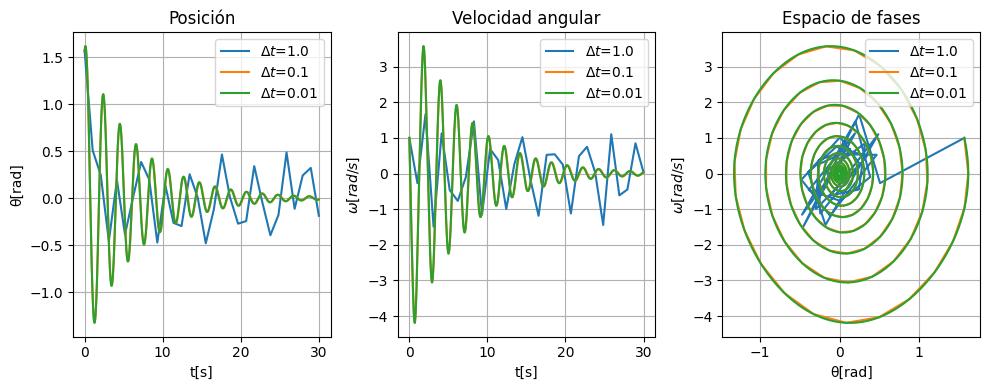

In [123]:
dts=np.array([1,0.1,0.01])
fig,axes=plt.subplots(1,3,figsize=(10,4))

for j in dts:
    n_=int((tb-ta)/j)
    t_=np.linspace(ta,tb,n_)
    θr__,wr__=runge(ta,tb,θ0,w0,j,params,0)

    axes[0].plot(t_,θr__,'-',label=f'$\Delta t$={j}')
    axes[0].set_title('Posición')
    axes[0].set_xlabel('t[s]')
    axes[0].set_ylabel('θ[rad]')
    axes[0].grid(True)
    axes[0].legend()

    axes[1].plot(t_,wr__,'-',label=f'$\Delta t$={j}')
    axes[1].set_title('Velocidad angular')
    axes[1].set_xlabel('t[s]')
    axes[1].set_ylabel('$\omega[rad/s]$')
    axes[1].grid(True)
    axes[1].legend()

    axes[2].plot(θr__,wr__,'-',label=f'$\Delta t$={j}')
    axes[2].set_title('Espacio de fases')
    axes[2].set_xlabel('θ[rad]')
    axes[2].set_ylabel('$\omega[rad/s]$')
    axes[2].grid(True)
    axes[2].legend()

    plt.tight_layout()

Notamos que para un $\Delta t$ muy grande, la simulación se ve afectada de tal manera que el tiempo se acorta y por ende hay menos datos, es decir, no termina la simulación de manera deseada sino que la trunca dado que `t=np.array([])` depende inversamente de $\Delta t$.

## Comparación $\sin(\theta)\approx\theta$

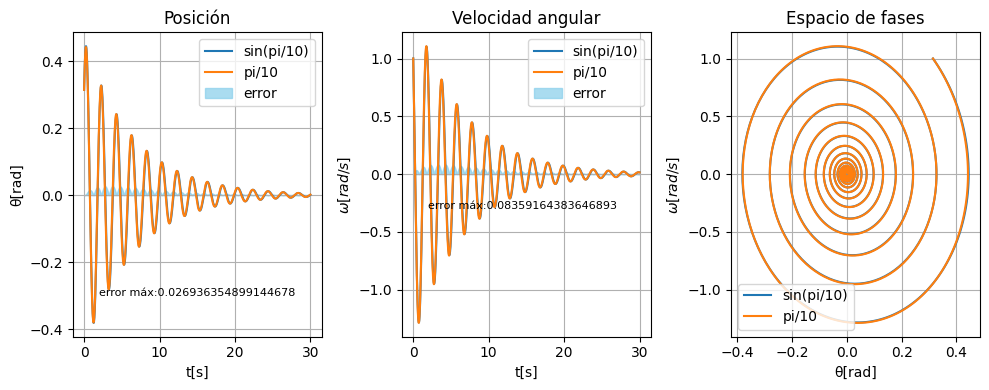

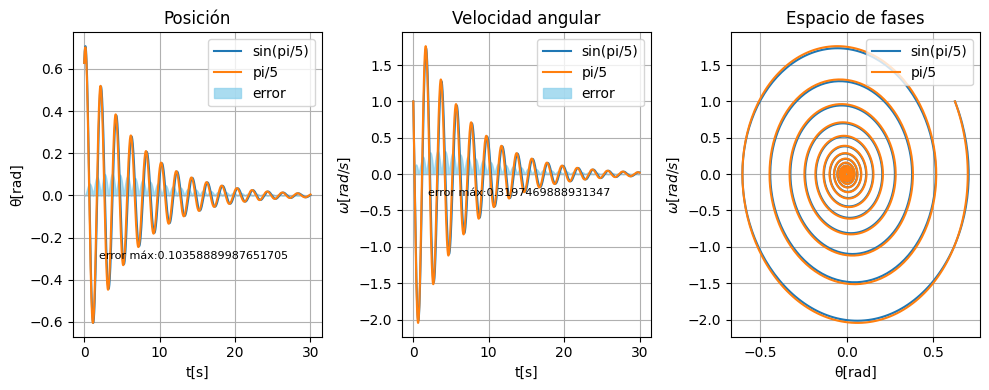

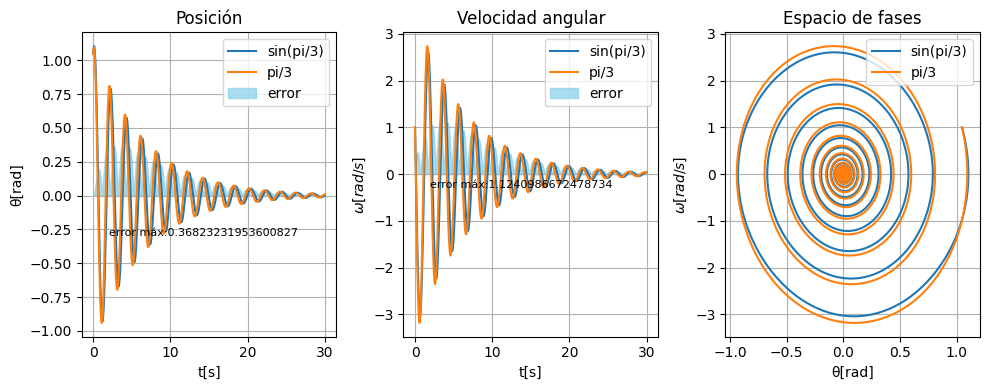

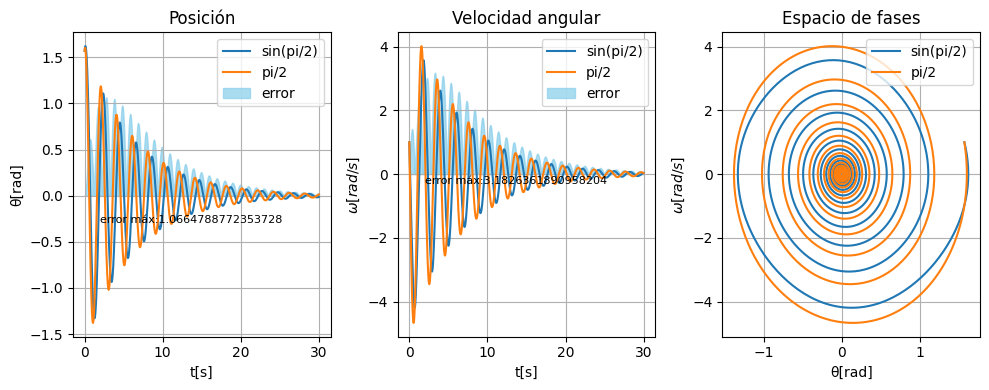

In [124]:
theta0=np.array([pi/10,pi/5,pi/3,pi/2])

for the in theta0:
    θr,wr=runge(ta,tb,the,w0,dt,params,0)
    θr1,wr1=runge(ta,tb,the,w0,dt,params,1)
    
    fig,axes=plt.subplots(1,3,figsize=(10,4))

    axes[0].plot(t,θr,'-',label=f'sin({the})')
    axes[0].plot(t,θr1,'-',label=f'{the}')
    axes[0].fill_between(t,np.abs(θr-θr1),color='skyblue',alpha=0.7,label='error')
    axes[0].text(2,-0.3,f'error máx:{np.max(np.abs(θr-θr1))}',fontsize=8)
    axes[0].set_title('Posición')
    axes[0].set_xlabel('t[s]')
    axes[0].set_ylabel('θ[rad]')
    axes[0].grid()
    axes[0].legend()

    axes[1].plot(t,wr,'-',label=f'sin({the})')
    axes[1].plot(t,wr1,'-',label=f'{the}')
    axes[1].fill_between(t,np.abs(wr-wr1),color='skyblue',alpha=0.7,label='error')
    axes[1].text(2,-0.3,f'error máx:{np.max(np.abs(wr-wr1))}',fontsize=8)
    axes[1].set_title('Velocidad angular')
    axes[1].set_xlabel('t[s]')
    axes[1].set_ylabel('$\omega[rad/s]$')
    axes[1].grid()
    axes[1].legend()

    axes[2].plot(θr,wr,'-',label=f'sin({the})')
    axes[2].plot(θr1,wr1,'-',label=f'{the}')
    axes[2].set_title('Espacio de fases')
    axes[2].set_xlabel('θ[rad]')
    axes[2].set_ylabel('$\omega[rad/s]$')
    axes[2].grid()
    axes[2].legend()

    plt.tight_layout()

Claramente se obseva que a medida que el ángulo va aumentando de muy pequeño a mayor, el error también crece y la aproximación $\sin(\theta)\approx \theta$ deja de ser factible. 

## Diferencias para distintos L con Runge-Kutta

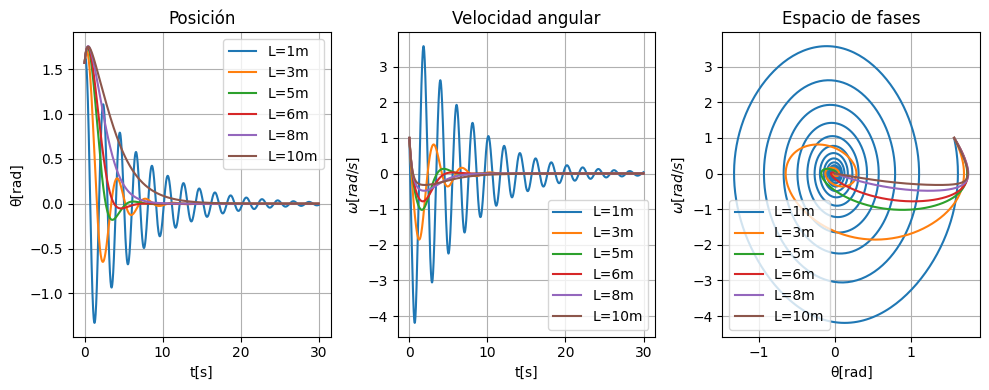

In [125]:
Ls=np.array([1,3,5,6,8,10])
fig,axes=plt.subplots(1,3,figsize=(10,4))

for i in Ls:
    param=(g,i,r)
    θr_,wr_=runge(ta,tb,θ0,w0,dt,param,0)

    axes[0].plot(t,θr_,'-',label=f'L={i}m')
    axes[0].set_title('Posición')
    axes[0].set_xlabel('t[s]')
    axes[0].set_ylabel('θ[rad]')
    axes[0].grid(True)
    axes[0].legend()

    axes[1].plot(t,wr_,'-',label=f'L={i}m')
    axes[1].set_title('Velocidad angular')
    axes[1].set_xlabel('t[s]')
    axes[1].set_ylabel('$\omega[rad/s]$')
    axes[1].grid(True)
    axes[1].legend()

    axes[2].plot(θr_,wr_,'-',label=f'L={i}m')
    axes[2].set_title('Espacio de fases')
    axes[2].set_xlabel('θ[rad]')
    axes[2].set_ylabel('$\omega[rad/s]$')
    axes[2].grid(True)
    axes[2].legend()

    plt.tight_layout()

En este caso notamos que a medida que el péndulo es más y más largo, oscila cada vez menos hasta el punto de ni siquiera oscilar una vez a partir de 7 metros de longitud aproximadamente. Y entre más corta la longitud más rápido oscilará.

## Diferencias para distintos $\theta_0$ con Runge-Kutta

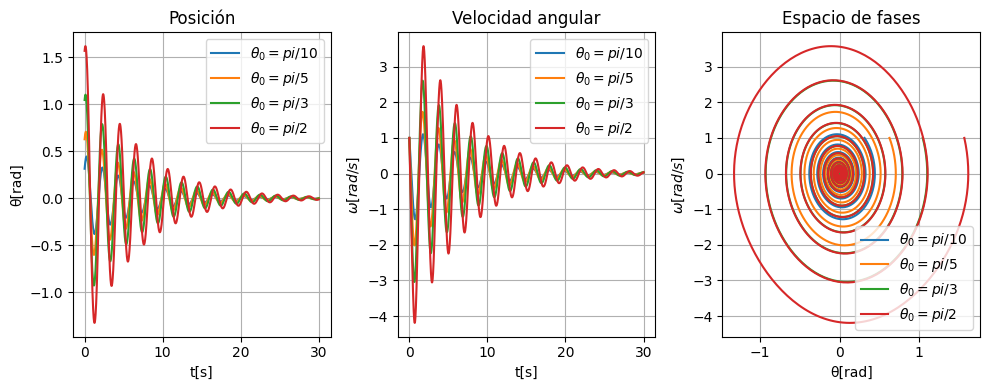

In [126]:
θs=np.array([pi/10,pi/5,pi/3,pi/2])
fig,axes=plt.subplots(1,3,figsize=(10,4))

for i in θs:
    θr,wr=runge(ta,tb,i,w0,dt,params,0)

    axes[0].plot(t,θr,'-',label=f'$θ_0={i}$')
    axes[0].set_title('Posición')
    axes[0].set_xlabel('t[s]')
    axes[0].set_ylabel('θ[rad]')
    axes[0].grid(True)
    axes[0].legend()

    axes[1].plot(t,wr,'-',label=f'$θ_0={i}$')
    axes[1].set_title('Velocidad angular')
    axes[1].set_xlabel('t[s]')
    axes[1].set_ylabel('$\omega[rad/s]$')
    axes[1].grid(True)
    axes[1].legend()

    axes[2].plot(θr,wr,'-',label=f'$θ_0={i}$')
    axes[2].set_title('Espacio de fases')
    axes[2].set_xlabel('θ[rad]')
    axes[2].set_ylabel('$\omega[rad/s]$')
    axes[2].grid(True)
    axes[2].legend()

    plt.tight_layout()

Con estas gráficas evidenciamos que a mayor ángulo inicial mayor es la amplitud de oscilación del péndulo.

## Evolución de la energía del sistema

La fuerza de fricción que actúa en este caso viene dada por,

\begin{equation}
F_f=-\gamma L \frac{dθ}{dt}
\end{equation}

es decir, $F_f=-\gamma L\omega$ donde $\omega$ es la velocidad angular.

Luego, la potencia instantánea de disipación debido a la fricción es el producto de la fuerza de fricción y la velocidad. Para un péndulo, esto se expresa como:

\begin{equation}
P_f=F_f v=-\gamma L\omega (L \omega)=-\gamma L^2 \omega^2
\end{equation}

donde $v=L\omega$ es la velocidad tangencial del péndulo.

De modo que la energía total del sistema queda de la forma:

\begin{equation}
E_{total}(t)=\frac{1}{2}mL^2\omega(t)^2+mgL(1-\cos(\theta(t)))-\gamma L^2 \omega(t)^2
\end{equation}

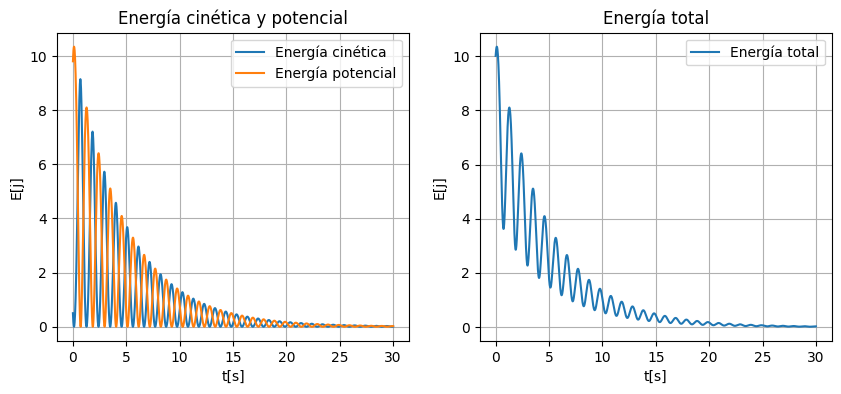

In [160]:
m=1

Ek=0.5*m*L**2*w**2
Ep=m*g*L*(1-np.cos(θ))
Ef=r*L**2*w**2

Et=Ek+Ep-Ef

fig,axes=plt.subplots(1,2,figsize=(10,4))

axes[0].plot(t,Ek,label='Energía cinética')
axes[0].plot(t,Ep,label='Energía potencial')
axes[0].set_title('Energía cinética y potencial')
axes[0].set_xlabel('t[s]')
axes[0].set_ylabel('E[J]')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(t,Et,label='Energía total')
axes[1].set_title('Energía total')
axes[1].set_xlabel('t[s]')
axes[1].set_ylabel('E[J]')
axes[1].grid(True)
axes[1].legend()

# Animación

In [182]:
%matplotlib qt

x=L*np.sin(θr)
y=-L*np.cos(θr)

fig,axes=plt.subplots()

axes.set_title('Péndulo simple con fricción')
axes.set_xlabel('x[m]')
axes.set_ylabel('y[m]')
axes.set_xlim(-1.2,1.2)
axes.set_ylim(-1.2,1.2)
axes.set_aspect('equal','box')
line,=axes.plot([],[],'o', markersize=5,color='red')  #Bolita
axes.grid()

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(x[frame], y[frame])
    return line,

ani = FuncAnimation(fig,update,frames=len(t),init_func=init,blit=True,interval=10)

#la animación del palito la quedo debiendo :v

C:\Users\crist\AppData\Local\Temp\ipykernel_1680\4048551479.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x[frame], y[frame])
